In [11]:

import keras
import matplotlib.pyplot as plt
from keras.callbacks import History

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [4]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

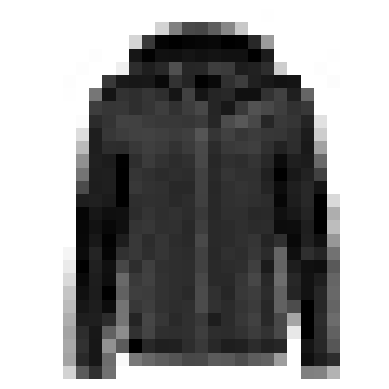

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [7]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

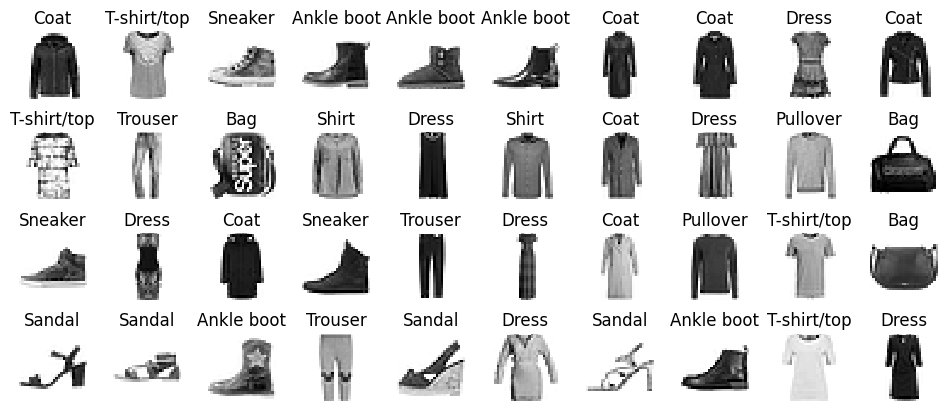

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.
Porównaj wyniki architektury fully connected (najlepszej jaką uda ci się zbudować) i architektury konwolucyjnej (najlepszej jaką uda ci się zbudować).


Wizualizuj wyniki:

* porównaj krzywe uczenia


In [12]:
history_fc = History()
model_fc = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model_fc.compile(loss="sparse_categorical_crossentropy",
                 optimizer="sgd",
                 metrics=["accuracy"])
model_fc.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[history_fc])

/home/krystianjachna/Desktop/AI/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30


2024-06-09 22:30:03.211360: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6762 - loss: 1.0106 - val_accuracy: 0.8356 - val_loss: 0.5024
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8244 - loss: 0.5090 - val_accuracy: 0.8322 - val_loss: 0.4737
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8435 - loss: 0.4480 - val_accuracy: 0.8408 - val_loss: 0.4454
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8520 - loss: 0.4225 - val_accuracy: 0.8504 - val_loss: 0.4334
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8618 - loss: 0.3990 - val_accuracy: 0.8642 - val_loss: 0.3933
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8647 - loss: 0.3876 - val_accuracy: 0.8656 - val_loss: 0.3762
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8704 - loss: 0.3705 - val_accuracy: 0.8734 - val_loss: 0.3631
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8741 - loss: 0.3566 - val_accurac

In [13]:
history_conv = History()

model_conv = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_conv.compile(loss="sparse_categorical_crossentropy",
                   optimizer="sgd",
                   metrics=["accuracy"])
model_conv.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=30,
               validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid), callbacks=[history_conv])

/home/krystianjachna/Desktop/AI/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5573 - loss: 1.2784 - val_accuracy: 0.7966 - val_loss: 0.5645
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7880 - loss: 0.5663 - val_accuracy: 0.8204 - val_loss: 0.4784
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8260 - loss: 0.4737 - val_accuracy: 0.8550 - val_loss: 0.4127
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8477 - loss: 0.4217 - val_accuracy: 0.8682 - val_loss: 0.3853
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8564 - loss: 0.3962 - val_accuracy: 0.8650 - val_loss: 0.3769
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8634 - loss: 0.3719 - val_accuracy: 0.8702 - val_loss: 0.3591
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8716 - loss: 0.3539 - val_accuracy: 0.8700 - val_loss: 0.3597
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8752 - loss:

In [14]:
final_loss_fc, final_accuracy_fc = model_fc.evaluate(X_test, y_test)
final_loss_conv, final_accuracy_conv = model_conv.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8752 - loss: 0.3426
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9013 - loss: 0.2882


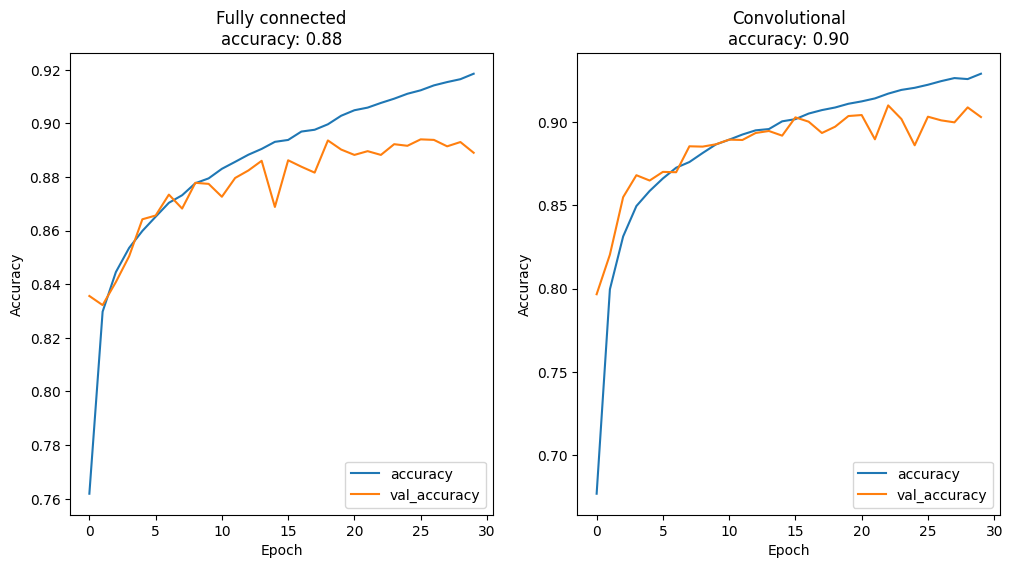

In [15]:
_, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(history_fc.history['accuracy'], label='accuracy')
axs[0].plot(history_fc.history['val_accuracy'], label='val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title(f'Fully connected\naccuracy: {final_accuracy_fc:.2f}')
axs[0].legend(loc='lower right')

axs[1].plot(history_conv.history['accuracy'], label='accuracy')
axs[1].plot(history_conv.history['val_accuracy'], label='val_accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title(f'Convolutional\naccuracy: {final_accuracy_conv:.2f}')
axs[1].legend(loc='lower right')
plt.show()